<a href="https://colab.research.google.com/github/David-S-Botero/BinaryClassificationWithKeras/blob/main/BinaryClassificationWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models,layers, optimizers

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
work_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
work_index = dict([(value,key) for (key, value) in work_index.items()])

In [ ]:
for _ in train_data[0]:
  print(work_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [ ]:
#One hot encoding
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1 
  return results

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_Y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 7s 55ms/step - loss: 0.5775 - accuracy: 0.7372 - val_loss: 0.4741 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3827 - accuracy: 0.8856 - val_loss: 0.3501 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2811 - accuracy: 0.9127 - val_loss: 0.3022 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2259 - accuracy: 0.9289 - val_loss: 0.2829 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1854 - accuracy: 0.9419 - val_loss: 0.2943 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1598 - accuracy: 0.9496 - val_loss: 0.2793 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1365 - accuracy: 0.9581 - val_loss: 0.2865 - val_accuracy: 0.8843
Epoch 8/20
30

In [52]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss)+1)

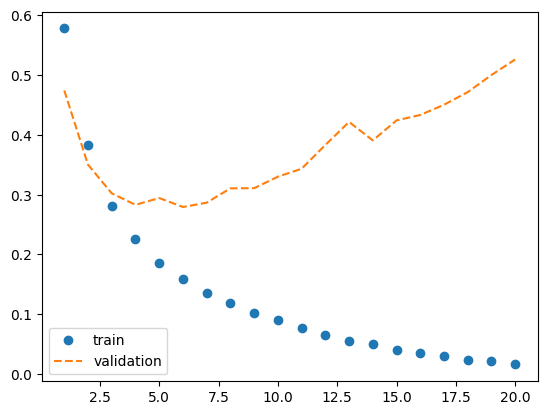

In [ ]:
plt.plot(epochs, loss, 'o', label='train')
plt.plot(epochs, val_loss, '--', label='validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.5739 - accuracy: 0.8572


[0.5739374160766602, 0.857200026512146]

In [ ]:
history_dict

{'loss': [0.5775161981582642,
  0.38270246982574463,
  0.2811133563518524,
  0.22592738270759583,
  0.1853570193052292,
  0.15983779728412628,
  0.1364520788192749,
  0.11905286461114883,
  0.10217247903347015,
  0.09012031555175781,
  0.07705175876617432,
  0.065645232796669,
  0.05581943318247795,
  0.051208995282649994,
  0.040891095995903015,
  0.03478121757507324,
  0.02977312169969082,
  0.0237988643348217,
  0.02143537811934948,
  0.016295429319143295],
 'accuracy': [0.7372000217437744,
  0.8855999708175659,
  0.9126666784286499,
  0.928933322429657,
  0.9418666958808899,
  0.9495999813079834,
  0.9580666422843933,
  0.9640666842460632,
  0.9720666408538818,
  0.9744666814804077,
  0.9803333282470703,
  0.9850000143051147,
  0.9881333112716675,
  0.9883333444595337,
  0.9929999709129333,
  0.9941333532333374,
  0.995199978351593,
  0.9971333146095276,
  0.9965333342552185,
  0.998533308506012],
 'val_loss': [0.47405415773391724,
  0.3500670790672302,
  0.3021680414676666,
  0.28

In [ ]:
#Less complex model
model2 = models.Sequential()
model2.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model2.add(layers.Dense(4, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')
history2 = model2.fit(partial_x_train, partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6822 - accuracy: 0.5847 - val_loss: 0.6705 - val_accuracy: 0.6148
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6559 - accuracy: 0.6763 - val_loss: 0.6458 - val_accuracy: 0.7270
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6104 - accuracy: 0.7806 - val_loss: 0.5852 - val_accuracy: 0.7605
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5409 - accuracy: 0.8421 - val_loss: 0.5157 - val_accuracy: 0.8562
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4638 - accuracy: 0.8816 - val_loss: 0.4529 - val_accuracy: 0.8742
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3965 - accuracy: 0.9012 - val_loss: 0.4003 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3401 - accuracy: 0.9141 - val_loss: 0.3608 - val_accuracy: 0.8784
Epoch 8/20
30

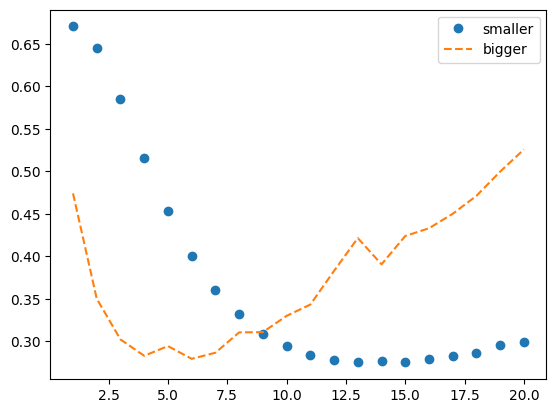

In [53]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_loss_2 = history2.history['val_loss']
val_accuracy2 = history2.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.plot(epochs, val_loss_2, 'o', label='smaller')
plt.plot(epochs, val_loss, '--', label='bigger')
plt.legend()
plt.show()

In [ ]:
from keras import regularizers

In [ ]:
#Regularization
model3 = models.Sequential()
model3.add(layers.Dense(4, activation = 'relu', input_shape = (10000,),
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(4, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation = 'sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')
history3 = model3.fit(partial_x_train, partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6196 - accuracy: 0.7233 - val_loss: 0.5515 - val_accuracy: 0.7999
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4923 - accuracy: 0.8619 - val_loss: 0.4684 - val_accuracy: 0.8496
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4120 - accuracy: 0.8935 - val_loss: 0.4153 - val_accuracy: 0.8640
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3557 - accuracy: 0.9055 - val_loss: 0.3733 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3168 - accuracy: 0.9164 - val_loss: 0.3579 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2894 - accuracy: 0.9235 - val_loss: 0.3364 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2677 - accuracy: 0.9295 - val_loss: 0.3278 - val_accuracy: 0.8897
Epoch 8/20
30

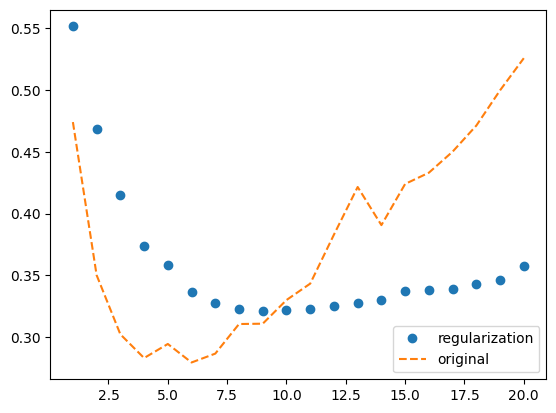

In [54]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_loss_3 = history3.history['val_loss']
val_accuracy3 = history3.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, val_loss_3, 'o', label='regularization')
plt.plot(epochs, val_loss, '--', label='original')
plt.legend()
plt.show()

In [ ]:
#Dropout
model4 = models.Sequential()
model4.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation = 'relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation = 'sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')
history4 = model4.fit(partial_x_train, partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.6715 - accuracy: 0.5557 - val_loss: 0.6158 - val_accuracy: 0.8302
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6269 - accuracy: 0.6041 - val_loss: 0.5611 - val_accuracy: 0.8447
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5994 - accuracy: 0.6214 - val_loss: 0.5299 - val_accuracy: 0.8641
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5705 - accuracy: 0.6427 - val_loss: 0.4937 - val_accuracy: 0.8684
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5536 - accuracy: 0.6548 - val_loss: 0.4673 - val_accuracy: 0.8770
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5355 - accuracy: 0.6647 - val_loss: 0.4464 - val_accuracy: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5204 - accuracy: 0.6716 - val_loss: 0.4168 - val_accuracy: 0.8721
Epoch 8/20
30

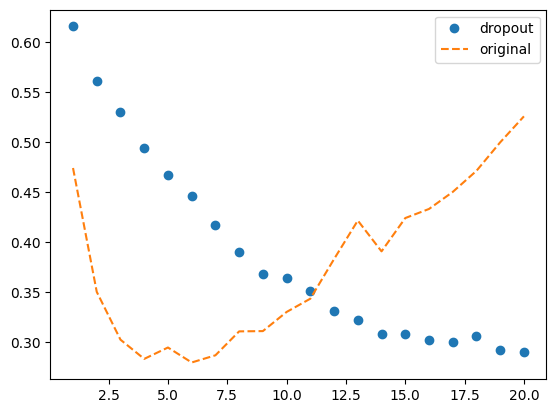

In [55]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_loss_4 = history4.history['val_loss']
val_accuracy4 = history4.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, val_loss_4, 'o', label='dropout')
plt.plot(epochs, val_loss, '--', label='original')
plt.legend()
plt.show()

In [64]:
#Dropout - Regularizer model
model5 = models.Sequential()
model5.add(layers.Dense(16, activation = 'relu', input_shape = (10000,), kernel_regularizer=regularizers.l1(0.0001)))
model5.add(layers.Dropout(0.25))
model5.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l1(0.0001)))
model5.add(layers.Dropout(0.05))
model5.add(layers.Dense(1, activation = 'sigmoid'))
model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')
history5 = model5.fit(partial_x_train, partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 106ms/step - loss: 0.7162 - accuracy: 0.7372 - val_loss: 0.5412 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4970 - accuracy: 0.8570 - val_loss: 0.4251 - val_accuracy: 0.8781
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4044 - accuracy: 0.8851 - val_loss: 0.3772 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3512 - accuracy: 0.9023 - val_loss: 0.3629 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3235 - accuracy: 0.9123 - val_loss: 0.3715 - val_accuracy: 0.8794
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3097 - accuracy: 0.9153 - val_loss: 0.3838 - val_accuracy: 0.8743
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2896 - accuracy: 0.9270 - val_loss: 0.3708 - val_accuracy: 0.8817
Epoch 8/20
3

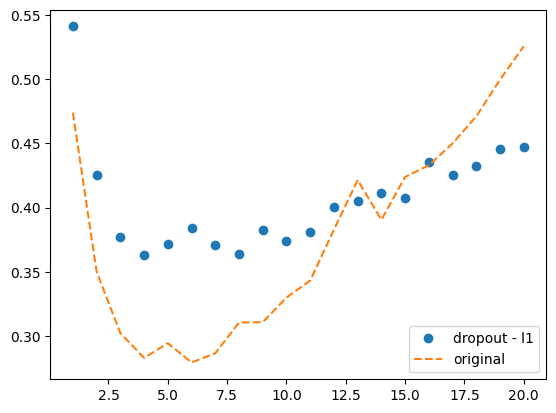

In [74]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_accuracy5 = history5.history['val_accuracy']
val_loss_5 = history5.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, val_loss_5, 'o', label='dropout - l1')
plt.plot(epochs, val_loss, '--', label='original')
plt.legend()
plt.show()

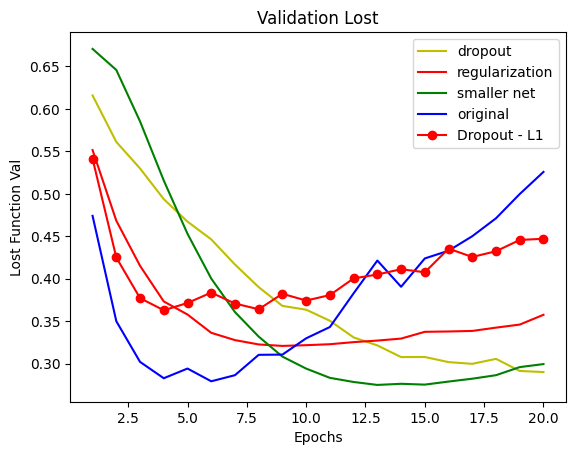

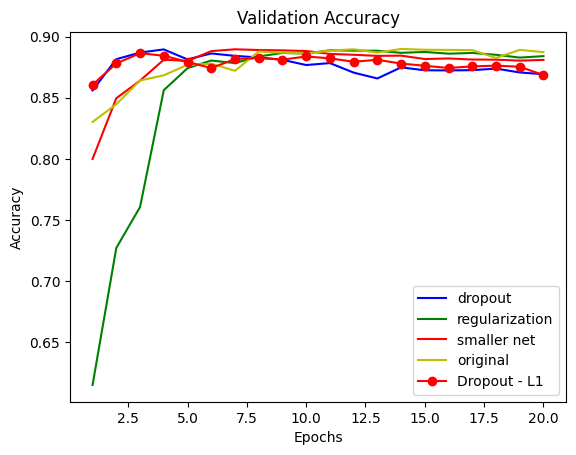

In [72]:
#Final Comparison Loss - Accuracy
plt.plot(epochs, val_loss_4, '-y', label='dropout')
plt.plot(epochs, val_loss_3, '-r', label='regularization')
plt.plot(epochs, val_loss_2, '-g', label='smaller net')
plt.plot(epochs, val_loss, '-b', label='original')
plt.plot(epochs, val_loss_5,'-or', label='Dropout - L1')
plt.legend()
plt.title('Validation Lost')
plt.xlabel('Epochs')
plt.ylabel('Lost Function Val')
plt.show()

plt.plot(epochs, val_accuracy, '-b', label='dropout')
plt.plot(epochs, val_accuracy2, '-g', label='regularization')
plt.plot(epochs, val_accuracy3, '-r', label='smaller net')
plt.plot(epochs, val_accuracy4, '-y', label='original')
plt.plot(epochs, val_accuracy5,'-or', label='Dropout - L1')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()